## Classification of CIFAR-10 Dataset (exercises)

This tutorial loads the CIFAR-10 dataset, creates, trains and evaluates a CNN, **but in order for the code to run, you need to work on the following tasks**:
- Create the network;
- Add early stopping to the compile function;
- Call predict to get the predictions of the model on the test data.  

### Download and process your dataset

The CIFAR-10 dataset consists of 60000 32×32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [96]:
import tensorflow as tf
from matplotlib import pyplot
from skimage.transform import resize
from keras.utils import to_categorical

The following code returns four variables:

- **x_train :=** A 3D numpy array with the images in a format (32, 32, 3) a 32x32 image with 3 dimmesions for colors RGB
- **y_train :=** A 1D numpy with the numbered labels for each sample stom x_train
- **x_test :=** same as x_train
- **y_test :=** same as y_train

In [97]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

Check shape of training and test data:

In [98]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


### Data preprocessing

Start plotting some example images:

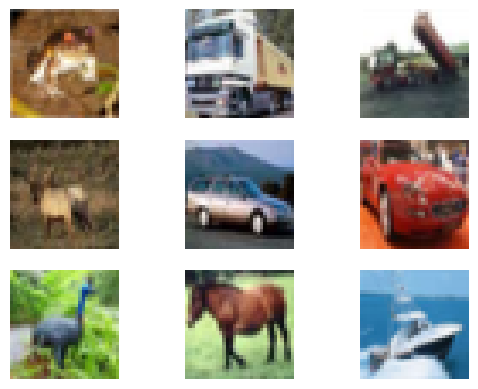

In [99]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i])
    pyplot.axis('off')  # Hide axes
    pyplot.grid(False)  # Hide grid
pyplot.show()

### Preprocess the data
- The data must be in a float32 represenation
- The data should be normalized
- The labels are one-hot encoded

In [100]:
# Transform images to a float32 type 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the input 
x_train /= 255
x_test /= 255

# One-hot Encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [101]:
# MinMax after normalization 
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Min Max Data = %s , %s' %(x_train.min(), x_train.max()))
print('Min Max Labels = %s , %s' %(y_train.min(), y_train.max()))

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)
Min Max Data = 0.0 , 1.0
Min Max Labels = 0.0 , 1.0


## Create the model
### TO DO: Create the network by adding layers to the Keras Sequential Model

Add the following layers:

- Conv2D, number of filters = 32, kernel size = (3,3), padding='same', activation='relu'
- BatchNormalization
- Conv2D, number of filters = 32, kernel size = (3,3), padding='same', activation='relu'
- BatchNormalization
- MaxPooling2D, pool_size = (2,2)
- Dropout, 0.3

- Conv2D, number of filters = 64, kernel size = (3,3), padding='same', activation='relu'
- BatchNormalization
- Conv2D, number of filters = 64, kernel size = (3,3), padding='same', activation='relu'
- BatchNormalization
- MaxPooling2D, pool_size = (2,2)
- Dropout, 0.5

- Conv2D, number of filters = 128, kernel size = (3,3), padding='same', activation='relu'
- BatchNormalization
- Conv2D, number of filters = 128, kernel size = (3,3), padding='same', activation='relu'
- BatchNormalization
- MaxPooling2D, pool_size = (2,2)
- Dropout, 0.5

- Flatten layer
- Dense, 128 neurons, activation = relu
- BatchNormalization
- Dropout, 0.5

In [ ]:
import keras
from keras.models import Sequential
import numpy as np
from keras import layers

# Create the model
model = Sequential()
####################
# Add layers here
####################
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

## Compile the model

### TO DO: add early stopping to the compile code (tip: use callbacks)

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Training and Validation

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 87ms/step - accuracy: 0.3137 - loss: 2.1724 - val_accuracy: 0.4949 - val_loss: 1.4126
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.5532 - loss: 1.2478 - val_accuracy: 0.5690 - val_loss: 1.2307
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.6398 - loss: 1.0201 - val_accuracy: 0.7212 - val_loss: 0.7853
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6835 - loss: 0.8963 - val_accuracy: 0.7282 - val_loss: 0.7810
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.7188 - loss: 0.8084 - val_accuracy: 0.7446 - val_loss: 0.7410


##  Plot Loss and Accuracy Curves 

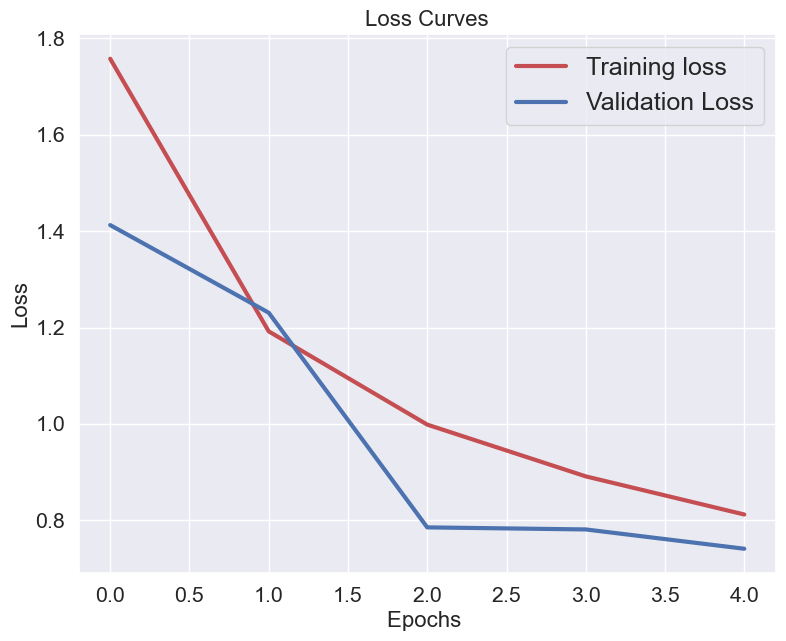

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loss
plt.figure(figsize=[9,7])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.grid(True)
plt.show()

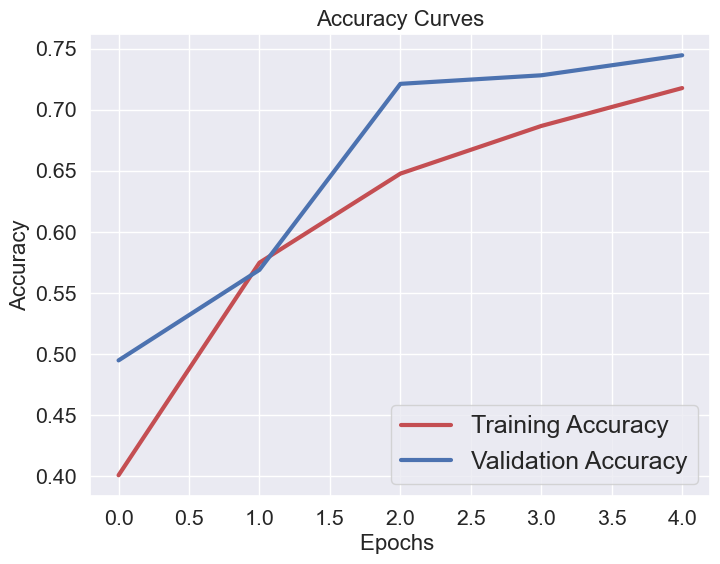

In [106]:
# Accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.grid(True)
plt.show()

## Save trained model weights

In [ ]:
# Save Keras model
model.save('cifar_model.keras')

print("Saved Keras model")

Saved Keras model


## Load trained model weights

In [ ]:
# Load Keras model
model = keras.models.load_model('cifar_model.keras')

## Test on saved image

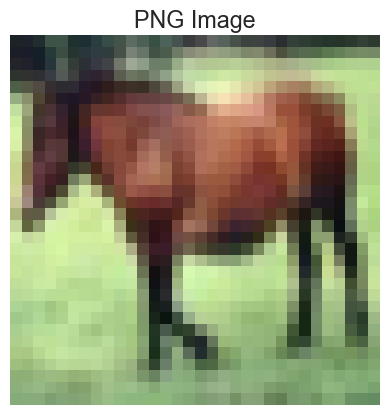

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('horse_image.png')
resized_horse = resize(image,(32,32,3))

# Display the image
plt.imshow(image)
plt.title('PNG Image')
plt.axis('off')
plt.show()

### Make prediction on single image

In [110]:
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

pred = model.predict(np.expand_dims(resized_horse, 0))
print("It seems to be a:", classes[pred.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
It seems to be a: horse


## Make Predictions on Test Data (and plot the confusion matrix)

### TO DO: Call prediction on the test dataset 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


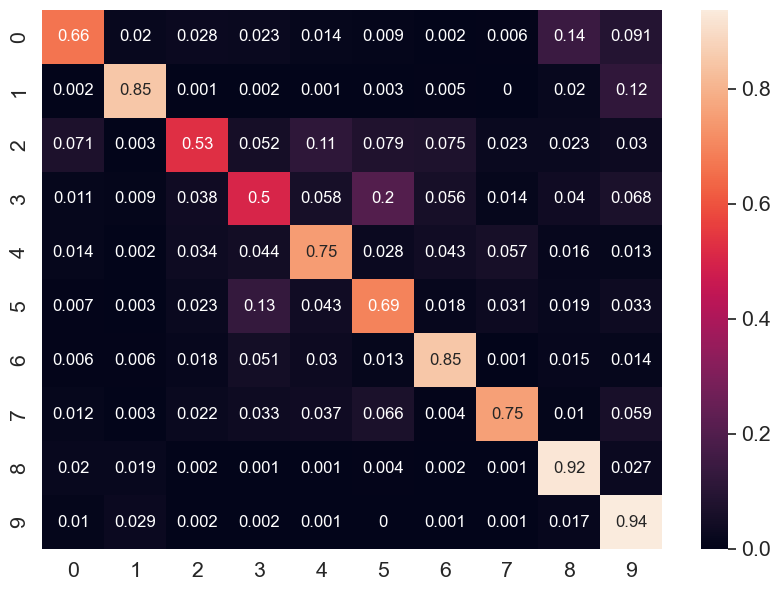

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#######################################################################
## Call predict on the test data here to create the predictions variable
#######################################################################

computed_predictions = np.argmax(predictions, axis=1)
rounded_labels=np.argmax(y_test, axis=1)

cm=confusion_matrix(rounded_labels,computed_predictions, normalize="true")

df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12}) # font size
plt.show()